In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
from itertools import product
from shapely.geometry import Point, LineString, MultiPoint
from shapely.ops import split, snap
from shapely.affinity import scale
from matplotlib.collections import LineCollection
%matplotlib inline

In [2]:
from utils import plot_flows

### Load data

In [3]:
counties = gpd.read_file(
    '../../ual_model_workspace/spring-2019-models/notebooks-max/cb_2016_us_county_500k/cb_2016_us_county_500k.shp')

In [4]:
flow_counts = pd.read_csv('../data/flow_counts.csv', dtype={'PROP_FIPSCD_from': str, 'PROP_FIPSCD_to': str})

### Create Bay Area Geoms

#### Boundaries

In [5]:
bayarea = {'Alameda': '001',
           'Contra Costa': '013',
           'Marin': '041',
           'Napa': '055',
           'San Francisco': '075',
           'San Mateo': '081',
           'Santa Clara': '085',
           'Solano': '095',
           'Sonoma': '097'}

In [6]:
mask = (counties['STATEFP'] == '06') & (counties['COUNTYFP'].isin(
    bayarea.values()))
gdf_bay = counties[mask]

### Directional flows

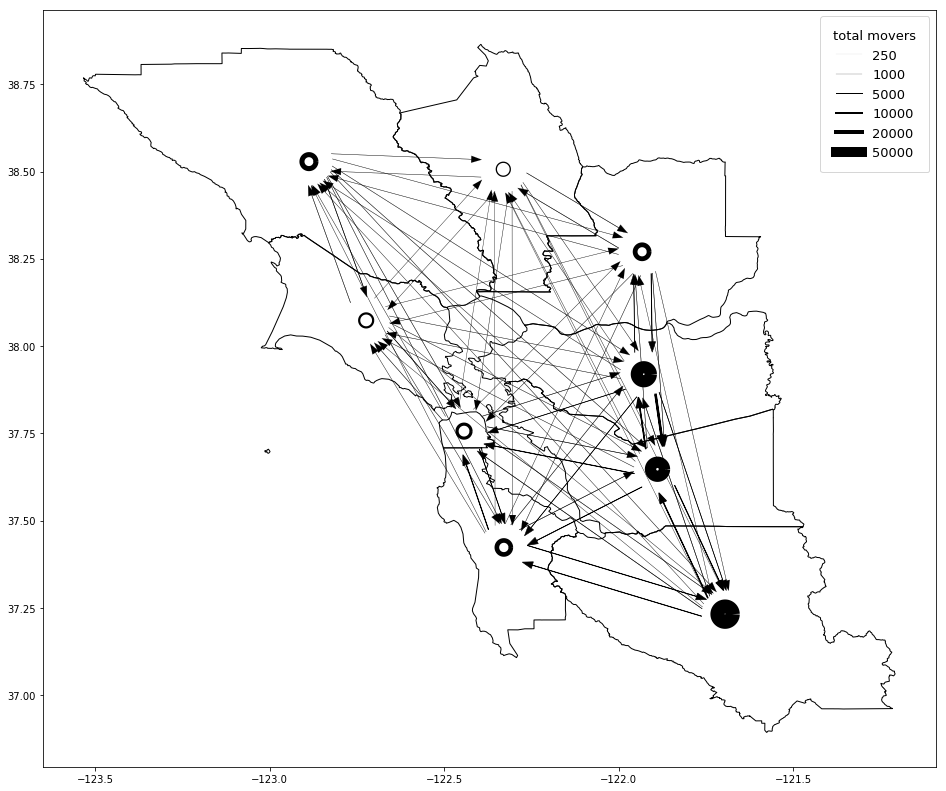

In [7]:
fig, ax = plt.subplots(figsize=(16,16))
plot_flows(ax, gdf_bay, 'GEOID', flow_counts, 'count', 'PROP_FIPSCD_from', 'PROP_FIPSCD_to', kind='directional')

### Total Flows

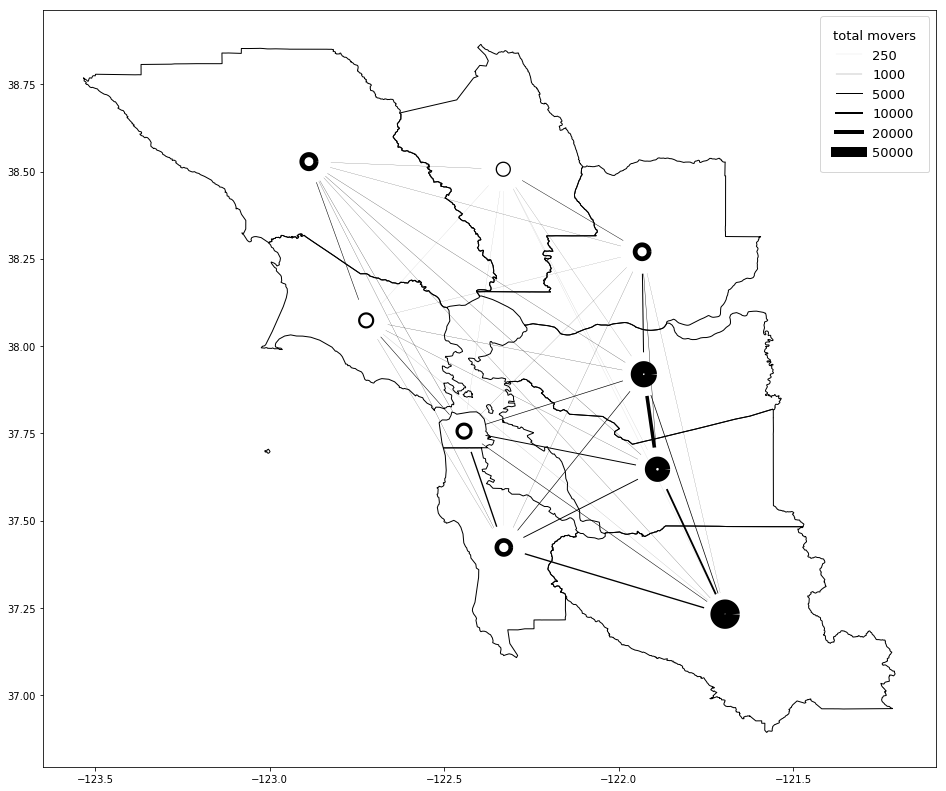

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
plot_flows(ax, gdf_bay, 'GEOID', flow_counts, 'count', 'PROP_FIPSCD_from', 'PROP_FIPSCD_to', kind='total')

### Net Flows

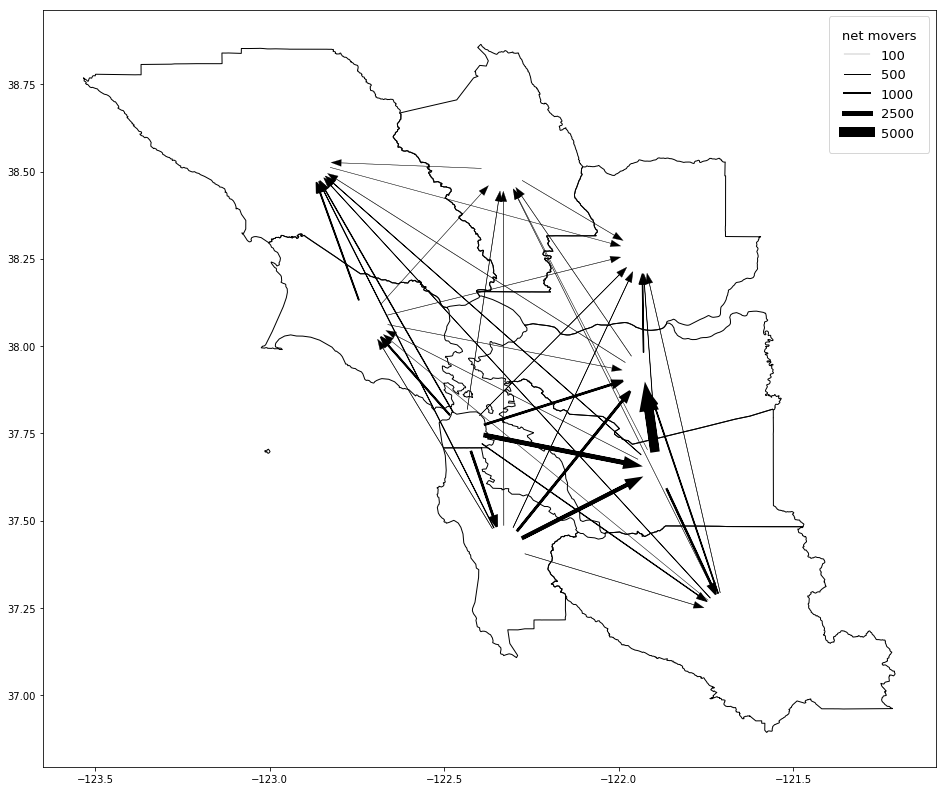

In [9]:
fig, ax = plt.subplots(figsize=(16,16))
plot_flows(ax, gdf_bay, 'GEOID', flow_counts, 'count', 'PROP_FIPSCD_from', 'PROP_FIPSCD_to', kind='net')